In [1]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emilsafarov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/emilsafarov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/emilsafarov/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
with open("/Users/emilsafarov/Library/CloudStorage/OneDrive-Personal/CF/CF_S1/20th-century/Scraped_data/timeline_20th_century_v4.txt", "r") as file:
    data = file.read()

# Preview first 1000 characters
print(data[:1000])

1900s - January 1: TheAustralian coloniesfederate.[1]
1900s - January 22:Edward VIIbecame King of England and India afterQueen Victoria's death.
1900s - March 2: ThePlatt Amendmentprovides for Cuban independence in exchange for the withdrawal of American troops.
1900s - June:Emily Hobhousereports on the poor conditions in 45 British internment camps forBoerwomen and children inSouth Africa.
1900s - September 6: The assassination ofWilliam McKinleyushered in office Vice PresidentTheodore Rooseveltafter McKinley's death on September 14.
1900s - September 7: TheEight-Nation Alliancedefeats theBoxer Rebellion, and imposes heavy financial penalties onChina.
1900s - December 10: FirstNobel Prizesawarded.
1900s - December 12:Guglielmo Marconireceived the first transatlantic radio signal.
1900s - January 13: TheUnification of Saudi Arabiabegins.
1900s - May 20:Cubagiven independence by the United States.
1900s - May 31:Second Boer Warends in British victory.
1900s - July 12:Arthur Balfourbecom

In [3]:
pip install wordninja

Note: you may need to restart the kernel to use updated packages.


In [4]:
import wordninja
from nltk.tokenize import word_tokenize

# Step 1: Use wordninja to split compound words
split_text = ' '.join(wordninja.split(data))  # Makes space-separated text

# Step 2: Now tokenize properly
tokenized_words = word_tokenize(split_text)

print(tokenized_words[:30])

['1900', 's', 'January', '1', 'The', 'Australian', 'colonies', 'federate', '1', '1900', 's', 'January', '22', 'Edward', 'VII', 'became', 'King', 'of', 'England', 'and', 'India', 'after', 'Queen', 'Victoria', "'s", 'death', '1900', 's', 'March', '2']


In [5]:
from nltk.corpus import stopwords
import string

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Filter the tokens
cleaned_tokens = [word for word in tokenized_words if word.lower() not in stop_words and word not in punctuation]

# Preview the first 30 cleaned words
print(cleaned_tokens[:30])

['1900', 'January', '1', 'Australian', 'colonies', 'federate', '1', '1900', 'January', '22', 'Edward', 'VII', 'became', 'King', 'England', 'India', 'Queen', 'Victoria', "'s", 'death', '1900', 'March', '2', 'Platt', 'Amendment', 'provides', 'Cuban', 'independence', 'exchange', 'withdrawal']


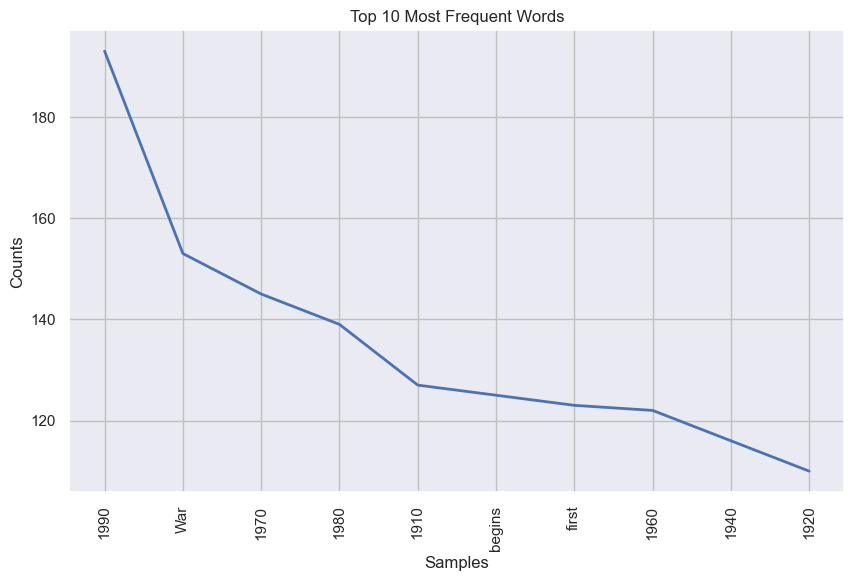

In [6]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Step 1: Create frequency distribution from cleaned tokens
freq_dist = FreqDist(cleaned_tokens)

# Step 2: Plot the 10 most common words
plt.figure(figsize=(10, 6))
freq_dist.plot(10, title='Top 10 Most Frequent Words')
plt.show()

In [7]:
# Tag parts of speech
pos_tags = nltk.pos_tag(cleaned_tokens)

# Show sample output
print(pos_tags[:10])

[('1900', 'CD'), ('January', 'NNP'), ('1', 'CD'), ('Australian', 'JJ'), ('colonies', 'NNS'), ('federate', 'VBP'), ('1', 'CD'), ('1900', 'CD'), ('January', 'NNP'), ('22', 'CD')]


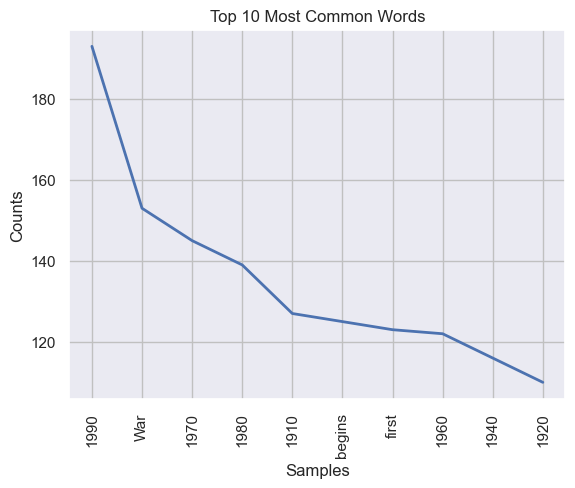

<AxesSubplot: title={'center': 'Top 10 Most Common Words'}, xlabel='Samples', ylabel='Counts'>

In [8]:
from nltk.probability import FreqDist

# Frequency distribution of tokens
freq_dist = FreqDist(cleaned_tokens)

# Plot the 10 most common words
freq_dist.plot(10, title="Top 10 Most Common Words")

In [9]:
from nltk.corpus import stopwords

# View list of English stopwords
print(stopwords.words("english"))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [10]:
from nltk.corpus import stopwords

# Load English stopwords
stop_words = set(stopwords.words("english"))

# Filter tokens to remove stopwords and non-alphabetic characters
filtered_tokens = [word.lower() for word in cleaned_tokens if word.isalpha() and word.lower() not in stop_words]

print(filtered_tokens[:20])  # Show sample cleaned tokens

['january', 'australian', 'colonies', 'federate', 'january', 'edward', 'vii', 'became', 'king', 'england', 'india', 'queen', 'victoria', 'death', 'march', 'platt', 'amendment', 'provides', 'cuban', 'independence']


In [11]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in tokenized_words if word.lower() not in stop_words and word.isalpha()]

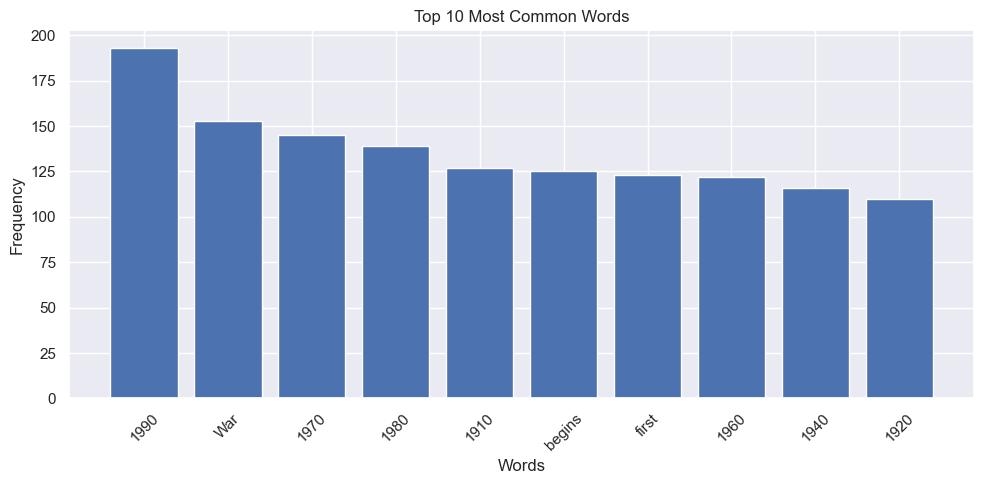

In [12]:
import matplotlib.pyplot as plt

# Get top 10 words
top_words = freq_dist.most_common(10)
words, counts = zip(*top_words)

# Plot
plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.title("Top 10 Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
tagged_words = nltk.pos_tag(filtered_words)
print(tagged_words[:10])  # View first 10 tagged words

[('january', 'JJ'), ('australian', 'JJ'), ('colonies', 'NNS'), ('federate', 'VBP'), ('january', 'JJ'), ('edward', 'RB'), ('vii', 'NN'), ('became', 'VBD'), ('king', 'JJ'), ('england', 'NN')]


In [14]:
nouns = [word for word, pos in tagged_words if pos.startswith('NN')]
print(nouns[:10])  # First 10 nouns

['colonies', 'vii', 'england', 'india', 'victoria', 'death', 'march', 'amendment', 'independence', 'exchange']


/opt/anaconda3/envs/text_mining_clean/lib/python3.10/site-packages/seaborn/_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


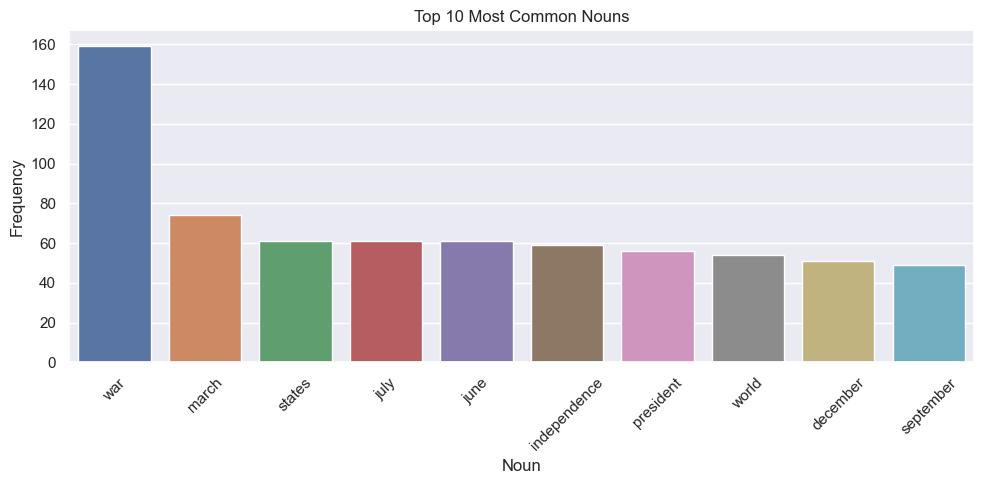

In [15]:
noun_freq = FreqDist(nouns)
common_nouns = noun_freq.most_common(10)

# Unzip for plotting
words, counts = zip(*common_nouns)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts))
plt.title("Top 10 Most Common Nouns")
plt.ylabel("Frequency")
plt.xlabel("Noun")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
blob = TextBlob(data)

In [17]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     /Users/emilsafarov/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [19]:
print(blob.noun_phrases[:10])

['january', 'theaustralian', '] 1900s', 'january', 'edward viibecame', 'england', 'india', 'victoria', "'s death", 'march']


In [20]:
pos_tags = blob.tags
print(pos_tags[:10])  # Show first 10 tagged words

[('1900s', 'CD'), ('January', 'NNP'), ('1', 'CD'), ('TheAustralian', 'JJ'), ('coloniesfederate', 'NN'), ('[', 'RB'), ('1', 'CD'), (']', 'JJ'), ('1900s', 'CD'), ('January', 'NNP')]


In [21]:
nouns = [word for word, tag in blob.tags if tag.startswith("NN")]
print(nouns[:10])

['January', 'coloniesfederate', 'January', 'Edward', 'VIIbecame', 'King', 'England', 'India', 'Victoria', 'death']


/opt/anaconda3/envs/text_mining_clean/lib/python3.10/site-packages/seaborn/_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


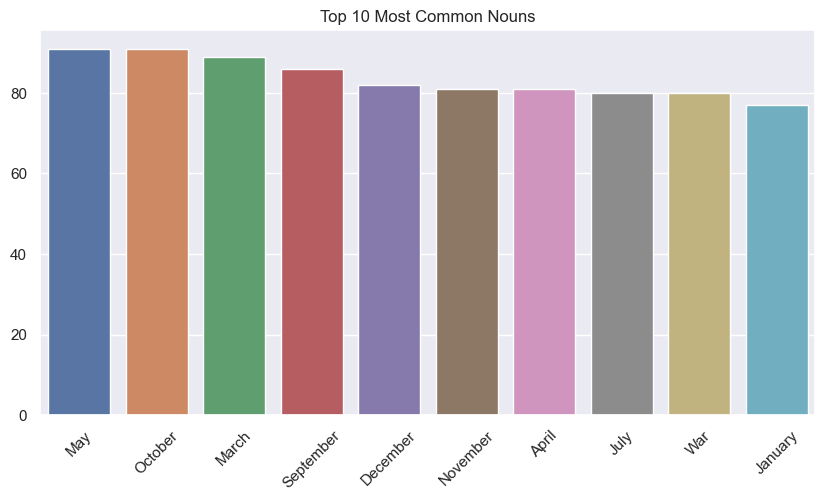

In [22]:
from collections import Counter

# Count the frequency of each noun
noun_counts = Counter(nouns)

# Get the 10 most common nouns
common_nouns = noun_counts.most_common(10)

# Plot
labels, values = zip(*common_nouns)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(labels), y=list(values))
plt.title("Top 10 Most Common Nouns")
plt.xticks(rotation=45)
plt.show()

In [23]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Named Entity Recognition using nltk
named_entities = nltk.ne_chunk(tagged_words)

# Print named entities
for chunk in named_entities:
    if hasattr(chunk, 'label'):
        print(f"{chunk.label()}: {' '.join(c[0] for c in chunk)}")

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/emilsafarov/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/emilsafarov/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [24]:
# Named Entity Recognition using nltk
named_entities = nltk.ne_chunk(tagged_words)

# Print extracted named entities
for chunk in named_entities:
    if hasattr(chunk, 'label'):
        print(f"{chunk.label()}: {' '.join(c[0] for c in chunk)}")

In [25]:
# Extract and collect named entities
entities = []
for chunk in nltk.ne_chunk(tagged_words):
    if hasattr(chunk, 'label'):
        entity = " ".join(c[0] for c in chunk)
        entities.append((entity, chunk.label()))

# Print top 10 named entities
print(entities[:10])

[]


In [26]:
from nltk import word_tokenize, pos_tag, ne_chunk

# Tokenize and tag full text
tokens = word_tokenize(data)
tagged_tokens = pos_tag(tokens)

# Extract named entities
entities = []
for chunk in ne_chunk(tagged_tokens):
    if hasattr(chunk, 'label'):
        entity = " ".join(c[0] for c in chunk)
        entities.append((entity, chunk.label()))

print(entities[:10])

[('Edward VIIbecame King', 'PERSON'), ('England', 'GPE'), ('India', 'GPE'), ('Victoria', 'GPE'), ('Cuban', 'GPE'), ('American', 'GPE'), ('British', 'GPE'), ('Africa', 'GPE'), ('ofWilliam', 'ORGANIZATION'), ('McKinley', 'ORGANIZATION')]
